### Imports

In [118]:
import pandas as pd
import numpy as np
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import inflect
from lda_model import simple_cleaner
from nltk.stem import WordNetLemmatizer
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['non','also'])
from sklearn.feature_extraction.text import CountVectorizer
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) 
# from bertopic import BERTopic
import scipy.stats as stats
from scipy.stats import norm
from sklearn.decomposition import TruncatedSVD
from collections import Counter
import re
from textblob import TextBlob
from sklearn.manifold import TSNE
from bokeh.plotting import figure, show
from bokeh.models import Label
from bokeh.io import output_notebook
from sklearn.decomposition import LatentDirichletAllocation


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trevor.sauerbrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trevor.sauerbrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\trevor.sauerbrey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Data Ingestion

In [119]:
%%time
df1a = pd.read_csv('arxiv_datasets/cs.AI_1.csv') # Artificial Intelligence 1
df1b = pd.read_csv('arxiv_datasets/cs.AI_2.csv') # Artificial Intelligence 2
df2 = pd.read_csv('arxiv_datasets/cs.CC.csv') # Computing and Computation
df3 = pd.read_csv('arxiv_datasets/cs.CE.csv') # Computational Engineering, Finance, and Science
df4 = pd.read_csv('arxiv_datasets/cs.CG.csv') # Computational Geometry
df5 = pd.read_csv('arxiv_datasets/cs.CL.csv') # Computation and Language
df6a = pd.read_csv('arxiv_datasets/cs.CV_1.csv') # Computer Vision and Pattern Recognition 1
df6b = pd.read_csv('arxiv_datasets/cs.CV_2.csv') # Computer Vision and Pattern Recognition 2
df7 = pd.read_csv('arxiv_datasets/cs.CY.csv') # Cybernetics
df8 = pd.read_csv('arxiv_datasets/cs.DB.csv') # Databases
df9 = pd.read_csv('arxiv_datasets/cs.DC.csv') # Distributed, Parallel, and Cluster Computing
df10 = pd.read_csv('arxiv_datasets/cs.DL.csv') # Machine Learning
df11 = pd.read_csv('arxiv_datasets/cs.DS.csv') # Data Structures and Algorithms
df12 = pd.read_csv('arxiv_datasets/cs.ET.csv') # Emerging Technologies
df13 = pd.read_csv('arxiv_datasets/cs.FL.csv') # Formal Languages and Automata Theory
df14 = pd.read_csv('arxiv_datasets/cs.GL.csv') # General Literature
df15 = pd.read_csv('arxiv_datasets/cs.GR.csv') # Graphics
df16 = pd.read_csv('arxiv_datasets/cs.GT.csv') # Computer Science and Game Theory
df17 = pd.read_csv('arxiv_datasets/cs.AR.csv') # Hardware Architecture
df18 = pd.read_csv('arxiv_datasets/cs.HC.csv') # Human-Computer Interaction
df19 = pd.read_csv('arxiv_datasets/cs.IR.csv') # Information Retrieval
df20 = pd.read_csv('arxiv_datasets/cs.IT.csv') # Information Theory
df21 = pd.read_csv('arxiv_datasets/cs.LO.csv') # Logic in Computer Science
df22a = pd.read_csv('arxiv_datasets/cs.LG_1.csv') # Learning 1
df22b = pd.read_csv('arxiv_datasets/cs.LG_2.csv') # Learning 2
df22c = pd.read_csv('arxiv_datasets/cs.LG_3.csv') # Learning 3
df23 = pd.read_csv('arxiv_datasets/cs.MA.csv') # Mathematical Aspects
df24 = pd.read_csv('arxiv_datasets/cs.MS.csv') # Multimedia
df25 = pd.read_csv('arxiv_datasets/cs.NI.csv') # Networking and Internet Architecture
df26 = pd.read_csv('arxiv_datasets/cs.NE.csv') # Neural and Evolutionary Computing
df27 = pd.read_csv('arxiv_datasets/cs.NA.csv') # Numerical Analysis
df28 = pd.read_csv('arxiv_datasets/cs.OS.csv') # Operating Systems
df29 = pd.read_csv('arxiv_datasets/cs.PF.csv') # Performance
df30 = pd.read_csv('arxiv_datasets/cs.PL.csv') # Programming Languages
df31 = pd.read_csv('arxiv_datasets/cs.RO.csv') # Robotics
df32 = pd.read_csv('arxiv_datasets/cs.SI.csv') # Social and Information Networks
df33 = pd.read_csv('arxiv_datasets/cs.SD.csv') # Sound
df34 = pd.read_csv('arxiv_datasets/cs.SE.csv') # Software Engineering
df35 = pd.read_csv('arxiv_datasets/cs.SC.csv') # Symbolic Computation
df36 = pd.read_csv('arxiv_datasets/cs.SY.csv') # Systems and Control
df37 = pd.read_csv('arxiv_datasets/cs.CR.csv') # Cryptography and Security
df38 = pd.read_csv('arxiv_datasets/cs.DM.csv') # Discrete Mathematics

# Concatenating multiple DataFrames into one DataFrame
# The naming convention suggests that 'df1a' and 'df1b' represent different parts of the same category, 'cs.AI'
# Similarly, 'df22a', 'df22b', and 'df22c' represent different parts of the category 'cs.LG'
# These parts are split due to file size limitations
df = pd.concat([
    df1a, df1b, df2, df3, df4, df5, df6a, df6b, df7, df8, df9, df10,
    df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
    df21, df22a, df22b, df22c, df23, df24, df25, df26, df27, df28, df29, df30,
    df31, df32, df33, df34, df35, df36, df37, df38
]).reset_index(drop=True)
df.head()

CPU times: total: 14.8 s
Wall time: 14.8 s


,Title,ID,Published,Updated,Summary,Author,Comments,Journal_Ref,Link,Primary_Category,Categories,DOI,License,Affiliation,Unnamed: 0
0,Domain-Independent Dynamic Programming,http://arxiv.org/abs/2401.13883v1,2024-01-25T01:48:09Z,2024-01-25T01:48:09Z,"For combinatorial optimization problems, mod...","['\nRyo Kuroiwa\n', '\nJ. Christopher Beck\n']",Manuscript submitted to JACM,NaN,http://arxiv.org/abs/2401.13883v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN
1,Agent-based Simulation with Netlogo to Evaluat...,http://arxiv.org/abs/2401.14153v1,2024-01-25T13:05:06Z,2024-01-25T13:05:06Z,In this paper an agent-based simulation is d...,"['\nJ. Carbo\n', '\nN. Sanchez\n', '\nJ. M. Mo...",NaN,NaN,http://dx.doi.org/10.1057/jos.2016.10,cs.AI,['cs.AI'],10.1057/jos.2016.10,NaN,[],NaN
2,Automated legal reasoning with discretion to a...,http://arxiv.org/abs/2401.14511v1,2024-01-25T21:11:08Z,2024-01-25T21:11:08Z,Automated legal reasoning and its applicatio...,"['\nJoaquín Arias\n', '\nMar Moreno-Rebato\n',...",NaN,Artificial Intelligence and Law (2023),http://dx.doi.org/10.1007/s10506-023-09376-5,cs.AI,"['cs.AI', 'I.2.1']",10.1007/s10506-023-09376-5,NaN,[],NaN
3,Efficient Constraint Generation for Stochastic...,http://arxiv.org/abs/2401.14636v1,2024-01-26T04:00:07Z,2024-01-26T04:00:07Z,Current methods for solving Stochastic Short...,"['\nJohannes Schmalz\n', '\nFelipe Trevizan\n']",Extended version of AAAI 2024 paper,NaN,http://arxiv.org/abs/2401.14636v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN
4,Synthetic Multimodal Dataset for Empowering Sa...,http://arxiv.org/abs/2401.14743v1,2024-01-26T10:05:41Z,2024-01-26T10:05:41Z,This paper presents a synthetic multimodal d...,"['\nTakanori Ugai\n', '\nShusaku Egami\n', '\n...","7 pages, 2 figures,4 tables",NaN,http://arxiv.org/abs/2401.14743v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN


In [78]:
sample_df = df.sample(n=10000, random_state=42)  
sample_df

,Title,ID,Published,Updated,Summary,Author,Comments,Journal_Ref,Link,Primary_Category,Categories,DOI,License,Affiliation,Unnamed: 0
145319,Improving CLIP Training with Language Rewrites,http://arxiv.org/abs/2305.20088v2,2023-05-31T17:59:04Z,2023-10-28T08:46:13Z,Contrastive Language-Image Pre-training (CLI...,"['\nLijie Fan\n', '\nDilip Krishnan\n', '\nPhi...",NeurIPS 2023,NaN,http://arxiv.org/abs/2305.20088v2,cs.CV,"['cs.CV', 'cs.CL', 'cs.LG']",NaN,NaN,[],NaN
523953,Some challenges of calibrating differentiable ...,http://arxiv.org/abs/2307.01085v1,2023-07-03T15:07:10Z,2023-07-03T15:07:10Z,Agent-based models (ABMs) are a promising ap...,"['\nArnau Quera-Bofarull\n', '\nJoel Dyer\n', ...",Accepted at the ICML 2023 Differentiable Almos...,NaN,http://arxiv.org/abs/2307.01085v1,cs.MA,"['cs.MA', 'cs.AI', 'q-fin.TR', 'stat.ML']",NaN,NaN,[],NaN
10378,Building Safe and Reliable AI systems for Safe...,http://arxiv.org/abs/2308.03176v1,2023-08-06T18:05:59Z,2023-08-06T18:05:59Z,Although AI systems have been applied in var...,['\nShuang Ao\n'],4 pages,2023,http://arxiv.org/abs/2308.03176v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN
370564,Set-Theoretic and Type-Theoretic Ordinals Coin...,http://arxiv.org/abs/2301.10696v3,2023-01-25T16:59:23Z,2023-06-12T21:12:33Z,"In constructive set theory, an ordinal is a ...","['\nTom de Jong\n', '\nNicolai Kraus\n', '\nFr...",v2: Minor changes. To appear at LICS'23. v3: A...,38th Annual ACM/IEEE Symposium on Logic in Com...,http://dx.doi.org/10.1109/LICS56636.2023.10175762,cs.LO,"['cs.LO', 'math.LO']",10.1109/LICS56636.2023.10175762,NaN,[],NaN
256472,The Energy Complexity of BFS in Radio Networks,http://arxiv.org/abs/2007.09816v1,2020-07-19T23:26:59Z,2020-07-19T23:26:59Z,We consider a model of energy complexity in ...,"['\nYi-Jun Chang\n', '\nVarsha Dani\n', '\nTho...",To appear in PODC 2020,NaN,http://arxiv.org/abs/2007.09816v1,cs.DS,"['cs.DS', 'cs.DC']",NaN,NaN,[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328018,Using Neighborhood Context to Improve Informat...,http://arxiv.org/abs/2108.10395v1,2021-08-23T20:30:48Z,2021-08-23T20:30:48Z,Information Extraction from visual documents...,"['\nKalpa Gunaratna\n', '\nVijay Srinivasan\n'...","accepted at CIKM 2021, pre-print version",NaN,http://dx.doi.org/10.1145/3459637.3482211,cs.LG,"['cs.LG', 'cs.IR']",10.1145/3459637.3482211,NaN,[],NaN
525352,Constructing games on networks for controlling...,http://arxiv.org/abs/2201.10913v1,2022-01-26T13:02:45Z,2022-01-26T13:02:45Z,The inequality in capital or resource distri...,['\nJarosław Adam Miszczak\n'],"13 pages, 4 figures, source code available at\...",Physica A: Statistical Mechanics and its Appli...,http://dx.doi.org/10.1016/j.physa.2022.126997,physics.soc-ph,"['physics.soc-ph', 'cond-mat.stat-mech', 'cs.G...",10.1016/j.physa.2022.126997,NaN,[],NaN
482202,Personalized Activity Recognition with Deep Tr...,http://arxiv.org/abs/2001.05517v1,2020-01-15T19:17:02Z,2020-01-15T19:17:02Z,A significant challenge for a supervised lea...,"['\nDavid M. Burns\n', '\nCari M. Whyne\n']",NaN,NaN,http://arxiv.org/abs/2001.05517v1,stat.ML,"['stat.ML', 'cs.LG', 'I.2.1']",NaN,NaN,[],1699.0
127450,Attention-Based Multimodal Fusion for Video De...,http://arxiv.org/abs/1701.03126v2,2017-01-11T19:16:42Z,2017-03-09T22:57:10Z,Currently successful methods for video descr...,"['\nChiori Hori\n', '\nTakaaki Hori\n', '\nTen...",Resubmitted to the rebuttal for CVPR 2017 for ...,NaN,http://arxiv.org/abs/1701.03126v2,cs.CV,"['cs.CV', 'cs.CL', 'cs.MM']",NaN,NaN,[],NaN


In [79]:
df = sample_df

In [120]:
reindexed_data = df['Title']
reindexed_data.index = df['Published']

df.head()

,Title,ID,Published,Updated,Summary,Author,Comments,Journal_Ref,Link,Primary_Category,Categories,DOI,License,Affiliation,Unnamed: 0
0,Domain-Independent Dynamic Programming,http://arxiv.org/abs/2401.13883v1,2024-01-25T01:48:09Z,2024-01-25T01:48:09Z,"For combinatorial optimization problems, mod...","['\nRyo Kuroiwa\n', '\nJ. Christopher Beck\n']",Manuscript submitted to JACM,NaN,http://arxiv.org/abs/2401.13883v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN
1,Agent-based Simulation with Netlogo to Evaluat...,http://arxiv.org/abs/2401.14153v1,2024-01-25T13:05:06Z,2024-01-25T13:05:06Z,In this paper an agent-based simulation is d...,"['\nJ. Carbo\n', '\nN. Sanchez\n', '\nJ. M. Mo...",NaN,NaN,http://dx.doi.org/10.1057/jos.2016.10,cs.AI,['cs.AI'],10.1057/jos.2016.10,NaN,[],NaN
2,Automated legal reasoning with discretion to a...,http://arxiv.org/abs/2401.14511v1,2024-01-25T21:11:08Z,2024-01-25T21:11:08Z,Automated legal reasoning and its applicatio...,"['\nJoaquín Arias\n', '\nMar Moreno-Rebato\n',...",NaN,Artificial Intelligence and Law (2023),http://dx.doi.org/10.1007/s10506-023-09376-5,cs.AI,"['cs.AI', 'I.2.1']",10.1007/s10506-023-09376-5,NaN,[],NaN
3,Efficient Constraint Generation for Stochastic...,http://arxiv.org/abs/2401.14636v1,2024-01-26T04:00:07Z,2024-01-26T04:00:07Z,Current methods for solving Stochastic Short...,"['\nJohannes Schmalz\n', '\nFelipe Trevizan\n']",Extended version of AAAI 2024 paper,NaN,http://arxiv.org/abs/2401.14636v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN
4,Synthetic Multimodal Dataset for Empowering Sa...,http://arxiv.org/abs/2401.14743v1,2024-01-26T10:05:41Z,2024-01-26T10:05:41Z,This paper presents a synthetic multimodal d...,"['\nTakanori Ugai\n', '\nShusaku Egami\n', '\n...","7 pages, 2 figures,4 tables",NaN,http://arxiv.org/abs/2401.14743v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN


In [121]:
# Define helper function to get the top n words
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    Returns a tuple of the top n words in a sample and their accompanying counts, given a CountVectorizer object and text sample.

    Parameters:
        n_top_words (int): Number of top words to return.
        count_vectorizer (CountVectorizer): CountVectorizer object used for vectorizing the text data.
        text_data (pandas.Series): Series containing the text data.

    Returns:
        tuple: A tuple containing two lists - the top n words and their accompanying counts.
    '''
    # Vectorize the headlines
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    # Sum up the vectors
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    # Get the indices of the top words
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    # Get the values of the top words
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    # Create word vectors
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1
    # Decode and extract words from the word vectors
    words = [word[0].encode('ascii').decode('utf-8') for word in count_vectorizer.inverse_transform(word_vectors)]
    return (words, word_values[0,:n_top_words].tolist()[0])

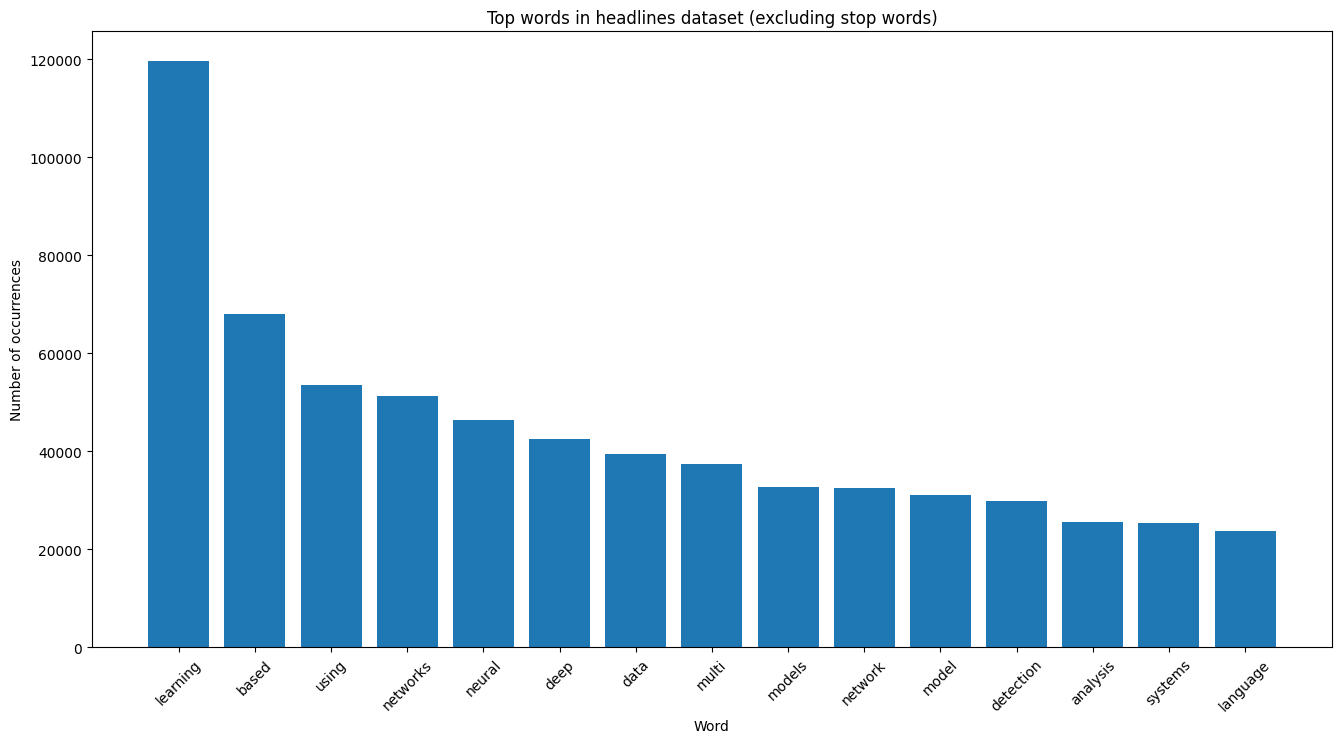

In [122]:
# Create a CountVectorizer object with English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Get the top words and their values
words, word_values = get_top_n_words(n_top_words=15, count_vectorizer=count_vectorizer, text_data=reindexed_data)

# Create a bar plot of the top words
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation=45)
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurrences')
plt.show()

In [123]:
%%time

# Perform part-of-speech tagging on each headline using TextBlob
tagged_headlines = [TextBlob(reindexed_data[i]).pos_tags for i in range(reindexed_data.shape[0])]

# Create a DataFrame to store the tagged headlines
tagged_headlines_df = pd.DataFrame({'tags': tagged_headlines})

# Initialize lists and dictionary to store word counts and part-of-speech counts
word_counts = [] 
pos_counts = {}

# Iterate over each tagged headline to calculate word counts and part-of-speech counts
for headline in tagged_headlines_df[u'tags']:
    # Count the number of words in each headline and add it to word_counts
    word_counts.append(len(headline))
    # Iterate over each word-tag pair in the headline
    for tag in headline:
        # Increment the count for the corresponding part-of-speech tag
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
# Print total number of words and mean number of words per headline
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per headline: ', np.mean(word_counts))

Total number of words:  6753864
Mean number of words per headline:  9.44168516644206
CPU times: total: 16min 45s
Wall time: 16min 49s


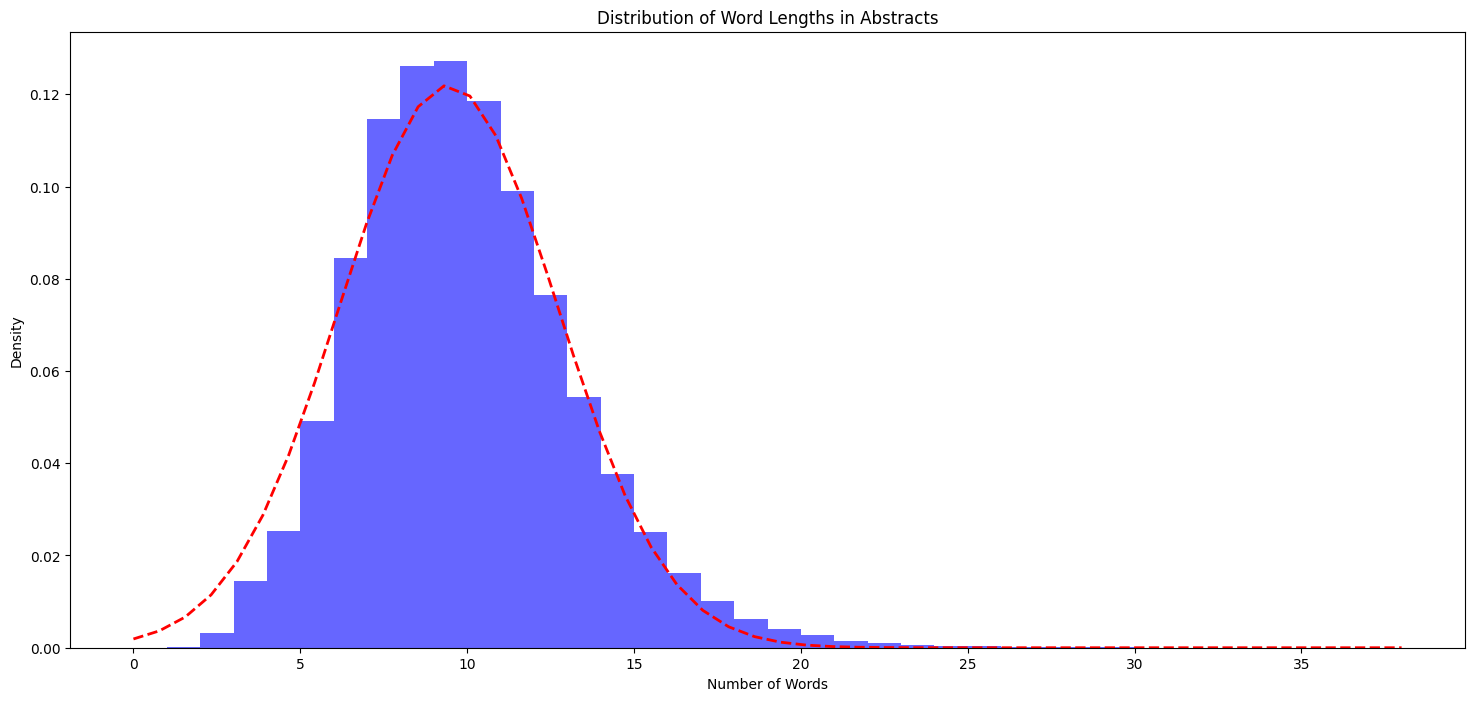

In [124]:
# Find the maximum word count and add 1 for the upper range
max_word_count = max(word_counts) + 1  

# Generate evenly spaced numbers over the interval from 0 to max_word_count, for plotting the PDF
x_values = np.linspace(0, max_word_count, 50)

# Calculate the Probability Density Function (PDF) for the normal distribution fit to the data
y = norm.pdf(x_values, np.mean(word_counts), np.std(word_counts))

# Create the plot
fig, ax = plt.subplots(figsize=(18, 8))

# Plot the histogram of word counts
ax.hist(word_counts, bins=range(1, max_word_count), density=True, alpha=0.6, color='b')

# Overlay the PDF
ax.plot(x_values, y, 'r--', linewidth=2)

# Set the title and labels
ax.set_title('Distribution of Word Lengths in Abstracts')
ax.set_xlabel('Number of Words')
ax.set_ylabel('Density')

plt.show()

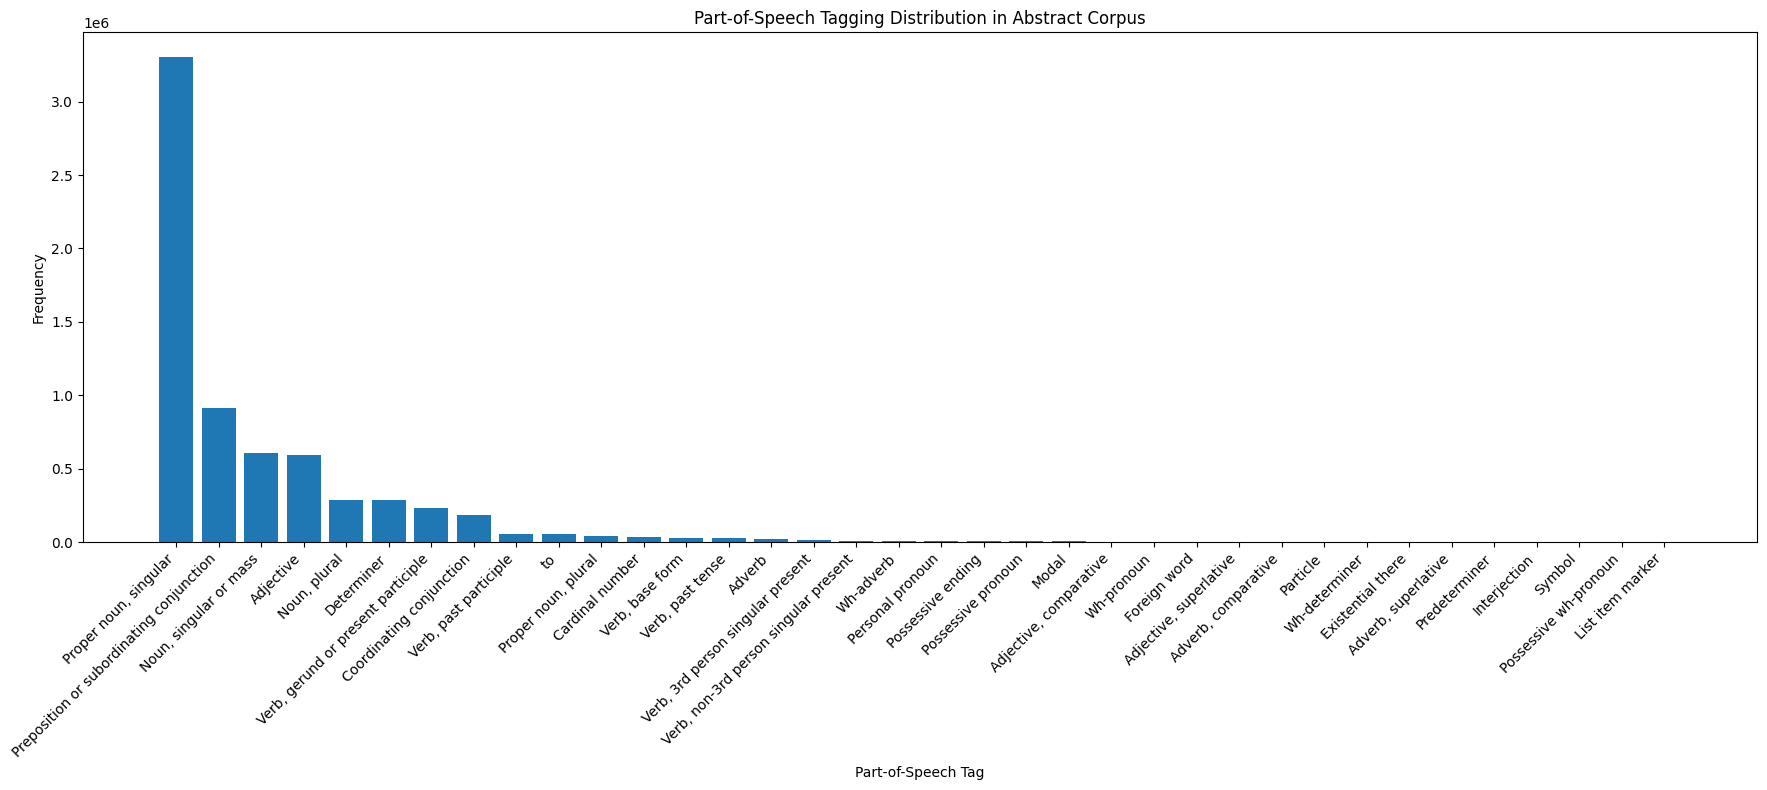

In [125]:
# POS tag descriptions dictionary
pos_descriptions = {
    "CC": "Coordinating conjunction",
    "CD": "Cardinal number",
    "DT": "Determiner",
    "EX": "Existential there",
    "FW": "Foreign word",
    "IN": "Preposition or subordinating conjunction",
    "JJ": "Adjective",
    "JJR": "Adjective, comparative",
    "JJS": "Adjective, superlative",
    "LS": "List item marker",
    "MD": "Modal",
    "NN": "Noun, singular or mass",
    "NNS": "Noun, plural",
    "NNP": "Proper noun, singular",
    "NNPS": "Proper noun, plural",
    "PDT": "Predeterminer",
    "POS": "Possessive ending",
    "PRP": "Personal pronoun",
    "PRP$": "Possessive pronoun",
    "RB": "Adverb",
    "RBR": "Adverb, comparative",
    "RBS": "Adverb, superlative",
    "RP": "Particle",
    "SYM": "Symbol",
    "TO": "to",
    "UH": "Interjection",
    "VB": "Verb, base form",
    "VBD": "Verb, past tense",
    "VBG": "Verb, gerund or present participle",
    "VBN": "Verb, past participle",
    "VBP": "Verb, non-3rd person singular present",
    "VBZ": "Verb, 3rd person singular present",
    "WDT": "Wh-determiner",
    "WP": "Wh-pronoun",
    "WP$": "Possessive wh-pronoun",
    "WRB": "Wh-adverb"
}

# Sort POS types and counts
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

# Map short POS tags to their descriptions for the x-tick labels
pos_sorted_descriptions = [pos_descriptions.get(tag, "Unknown") for tag in pos_sorted_types]

# Plotting
fig, ax = plt.subplots(figsize=(18, 8))
ax.bar(range(len(pos_counts)), pos_sorted_counts)
ax.set_xticks(range(len(pos_counts)))
ax.set_xticklabels(pos_sorted_descriptions, rotation=45, ha="right")  
ax.set_title('Part-of-Speech Tagging Distribution in Abstract Corpus')
ax.set_xlabel('Part-of-Speech Tag')
ax.set_ylabel('Frequency')
plt.tight_layout()  
plt.show()

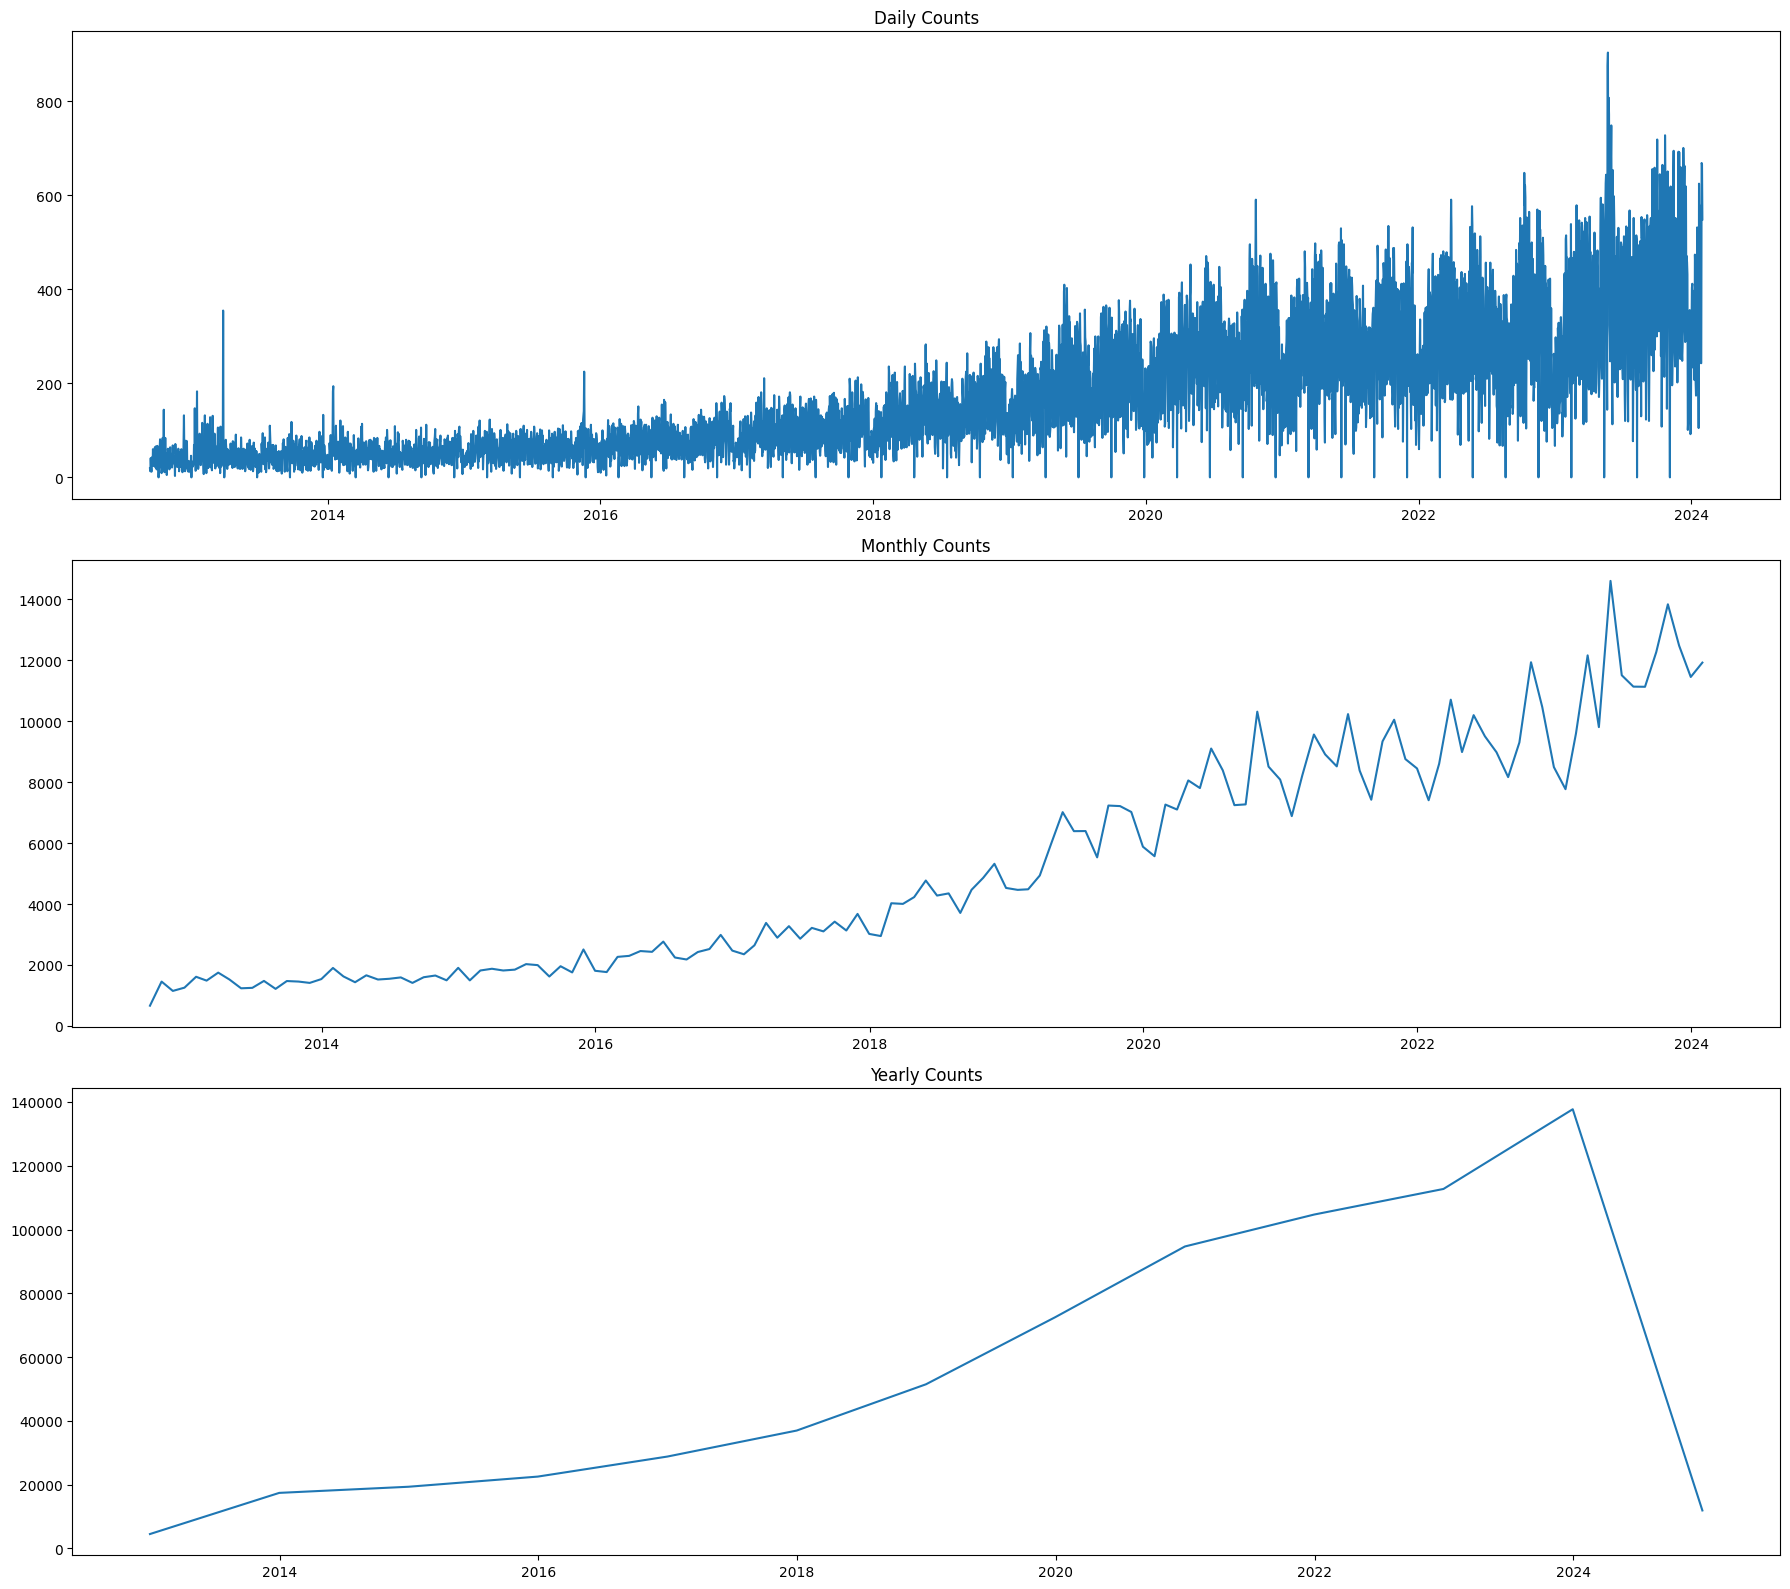

In [126]:
# Convert index to DateTimeIndex
reindexed_data.index = pd.to_datetime(reindexed_data.index)

# Resample the data to get counts for different time periods
monthly_counts = reindexed_data.resample('M').count()
yearly_counts = reindexed_data.resample('A').count()
daily_counts = reindexed_data.resample('D').count()

# Create subplots
fig, ax = plt.subplots(3, figsize=(18,16))

# Plot daily counts
ax[0].plot(daily_counts)
ax[0].set_title('Daily Counts')
# Plot monthly counts
ax[1].plot(monthly_counts)
ax[1].set_title('Monthly Counts')
# Plot yearly counts
ax[2].plot(yearly_counts)
ax[2].set_title('Yearly Counts')

plt.tight_layout()
plt.show()

In [127]:
# Initialize CountVectorizer with specified parameters
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)

# Sample 10,000 titles randomly from the dataset
small_text_sample = reindexed_data.sample(n=10000, random_state=0).values

# Print an example title before vectorization
print('Title/Topic before vectorization: {}'.format(small_text_sample[123]))

# Transform the sampled titles into a document-term matrix using CountVectorizer
small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

# Print an example title after vectorization
print('Title/Topic after vectorization: \n{}'.format(small_document_term_matrix[123]))

Title/Topic before vectorization: Estimating the Expected Influence Capacities of Nodes in Complex
  Networks under the Susceptible-Infectious-Recovered (SIR) Model
Title/Topic after vectorization: 
  (0, 6855)	1
  (0, 6532)	1
  (0, 1900)	1
  (0, 3651)	1
  (0, 3549)	1
  (0, 5147)	1
  (0, 1363)	1
  (0, 6930)	1
  (0, 10097)	1
  (0, 5134)	1
  (0, 8457)	1
  (0, 9424)	1


In [128]:
# Number of topics for topic modeling
n_topics = 8

In [129]:
# Initialize the Latent Semantic Analysis (LSA) model with the specified number of topics
lsa_model = TruncatedSVD(n_components=n_topics)

# Fit the LSA model to the document-term matrix to extract latent topics
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [130]:
# Define helper function to extract predicted topic categories
def get_keys(topic_matrix):
    '''
    Returns an integer list of predicted topic categories for a given topic matrix.

    Parameters:
        topic_matrix (numpy.ndarray): Topic matrix obtained from topic modeling.

    Returns:
        list: A list of predicted topic categories.
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

# Define helper function to convert keys into counts
def keys_to_counts(keys):
    '''
    Returns a tuple of topic categories and their accompanying magnitudes for a given list of keys.

    Parameters:
        keys (list): List of predicted topic categories.

    Returns:
        tuple: A tuple containing two lists - categories and their corresponding counts.
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [131]:
# Get the predicted topic categories for each document
lsa_keys = get_keys(lsa_topic_matrix)

# Convert keys into counts of each topic category
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [132]:
# Define helper function to get the top words for each topic
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    Returns a list of strings, where each string contains the n most common 
    words in a predicted category, in order.

    Parameters:
        n (int): Number of top words to retrieve for each topic.
        keys (list): List of predicted topic categories for each document.
        document_term_matrix (numpy.ndarray): Document-term matrix obtained from vectorization.
        count_vectorizer (CountVectorizer): CountVectorizer object used for vectorization.

    Returns:
        list: A list of strings containing the top words for each predicted category.
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [133]:
# Get the top words for each topic using the helper function
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

# Print the top words for each topic
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  learning deep reinforcement based machine using multi control supervised online
Topic 2:  networks neural graph using based convolutional deep prediction network detection
Topic 3:  based model detection approach multi control image data recognition framework
Topic 4:  using detection estimation data analysis recognition object speech graphs network
Topic 5:  multi model analysis systems time image efficient framework text information
Topic 6:  data driven analysis augmentation systems efficient mining approach big training
Topic 7:  models language large understanding model natural speech visual knowledge image
Topic 8:  network detection deep neural object segmentation attention image convolutional graph


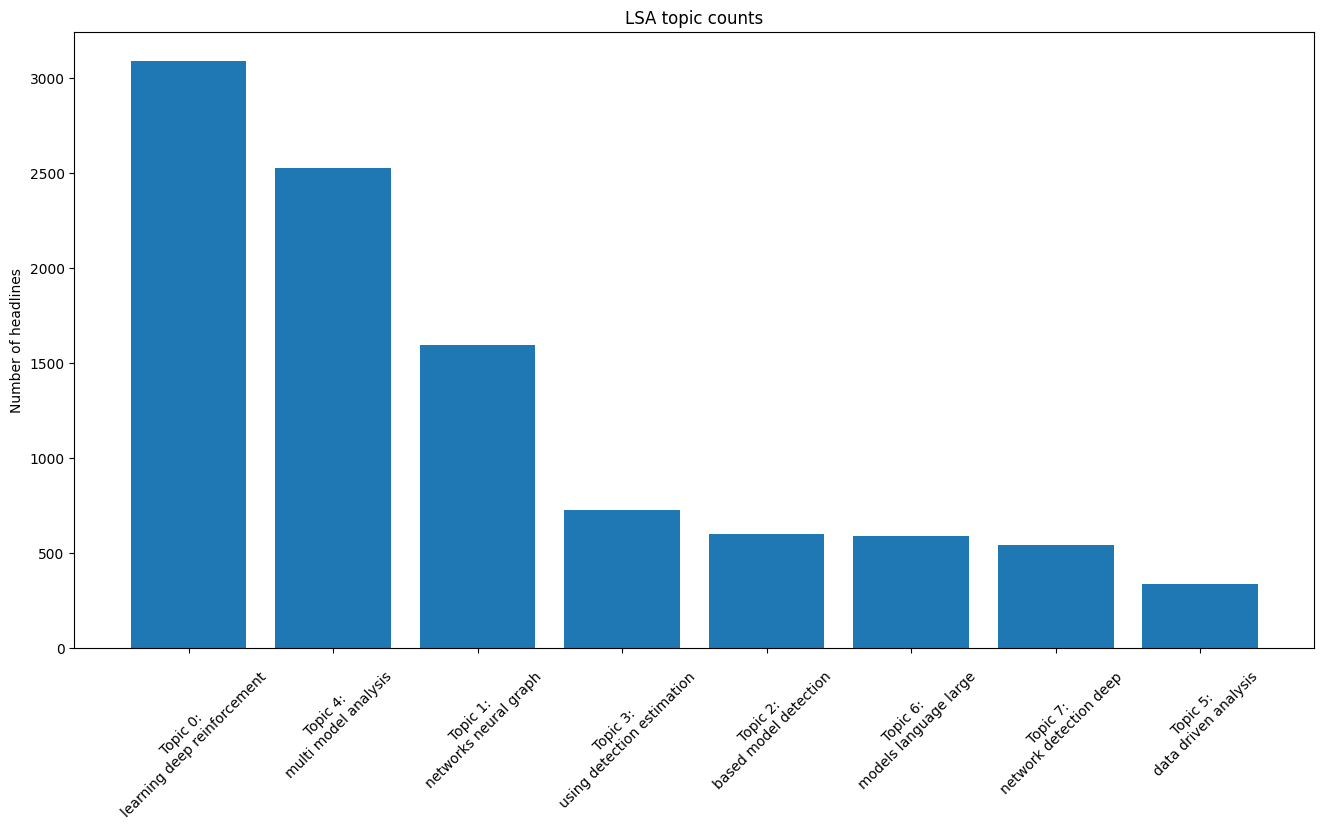

In [152]:
# Get the top 3 words for each topic
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)

# Create labels for each topic combining the topic number and the top 3 words
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

# Sort the LSA categories and counts in descending order
sorted_indices = np.argsort(lsa_counts)[::-1]
sorted_categories = [lsa_categories[i] for i in sorted_indices]
sorted_counts = [lsa_counts[i] for i in sorted_indices]

# Create the plot
fig, ax = plt.subplots(figsize=(16,8))

# Plot the LSA topic counts in descending order
ax.bar(range(len(sorted_categories)), sorted_counts)

# Set x-axis ticks and labels
ax.set_xticks(range(len(sorted_categories)))
ax.set_xticklabels([labels[i] for i in sorted_indices], rotation=45)  

# Set y-axis label and title
ax.set_ylabel('Number of headlines')
ax.set_title('LSA topic counts')

# Show the plot
plt.show()

In [135]:
# Initialize t-SNE model with specified parameters
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                      n_iter=2000, verbose=1, random_state=0, angle=0.75)

# Fit the t-SNE model to the LSA topic matrix
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.025s...
[t-SNE] Computed neighbors for 10000 samples in 1.192s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.009992
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.727158
[t-SNE] KL divergence after 2000 iterations: 0.954280


In [136]:
# Define a helper function to calculate the mean topic vectors
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    Calculate and return a list of centroid vectors from each predicted topic category.
    
    Parameters:
        keys (list): List of predicted topic categories for each document.
        two_dim_vectors (array-like): 2D array of two-dimensional vectors.
        
    Returns:
        list: List of centroid vectors from each predicted topic category.
    '''
    mean_topic_vectors = []
    # Loop through each topic category
    for t in range(n_topics):
        articles_in_that_topic = []
        # Gather all vectors associated with the current topic category
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])
        
        # Convert gathered vectors into a numpy array
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        # Calculate the mean vector for the current topic category
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        # Append the mean vector to the list of mean topic vectors
        mean_topic_vectors.append(mean_article_in_that_topic)
    
    return mean_topic_vectors

In [137]:
# Define a colormap for visualizing different topics
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])

# Truncate the colormap to match the number of topics
colormap = colormap[:n_topics]

In [138]:
# Get the top 3 words for each LSA topic
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)

# Calculate mean topic vectors for t-SNE visualization
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

# Create a Bokeh plot for t-SNE clustering of LSA topics
plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), width=700, height=700)

# Scatter plot the t-SNE vectors with colors corresponding to LSA topic keys
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

# Add labels for each topic at its mean coordinates
for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)

# Output the plot to the notebook
output_notebook()
show(plot)

Loading BokehJS ...

In [139]:
# Initialize Latent Dirichlet Allocation (LDA) model
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=0, verbose=0)

# Fit LDA model to the document-term matrix
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [140]:
# Get the predicted topic categories for each document from the LDA topic matrix
lda_keys = get_keys(lda_topic_matrix)

# Convert keys into counts of each topic category
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [141]:
# Get the top words for each topic using the LDA model
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

# Print the top words for each topic
for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  using social detection analysis human learning method data based robot
Topic 2:  multi 3d learning based model quantum systems attention image codes
Topic 3:  neural networks using graph network based learning deep convolutional detection
Topic 4:  learning based time systems detection data distributed deep real using
Topic 5:  framework using learning analysis adversarial based ai estimation generative networks
Topic 6:  learning based multi optimization networks data reinforcement agent using algorithm
Topic 7:  learning models machine language information large data systems privacy graphs
Topic 8:  learning based deep models model image language data multi using


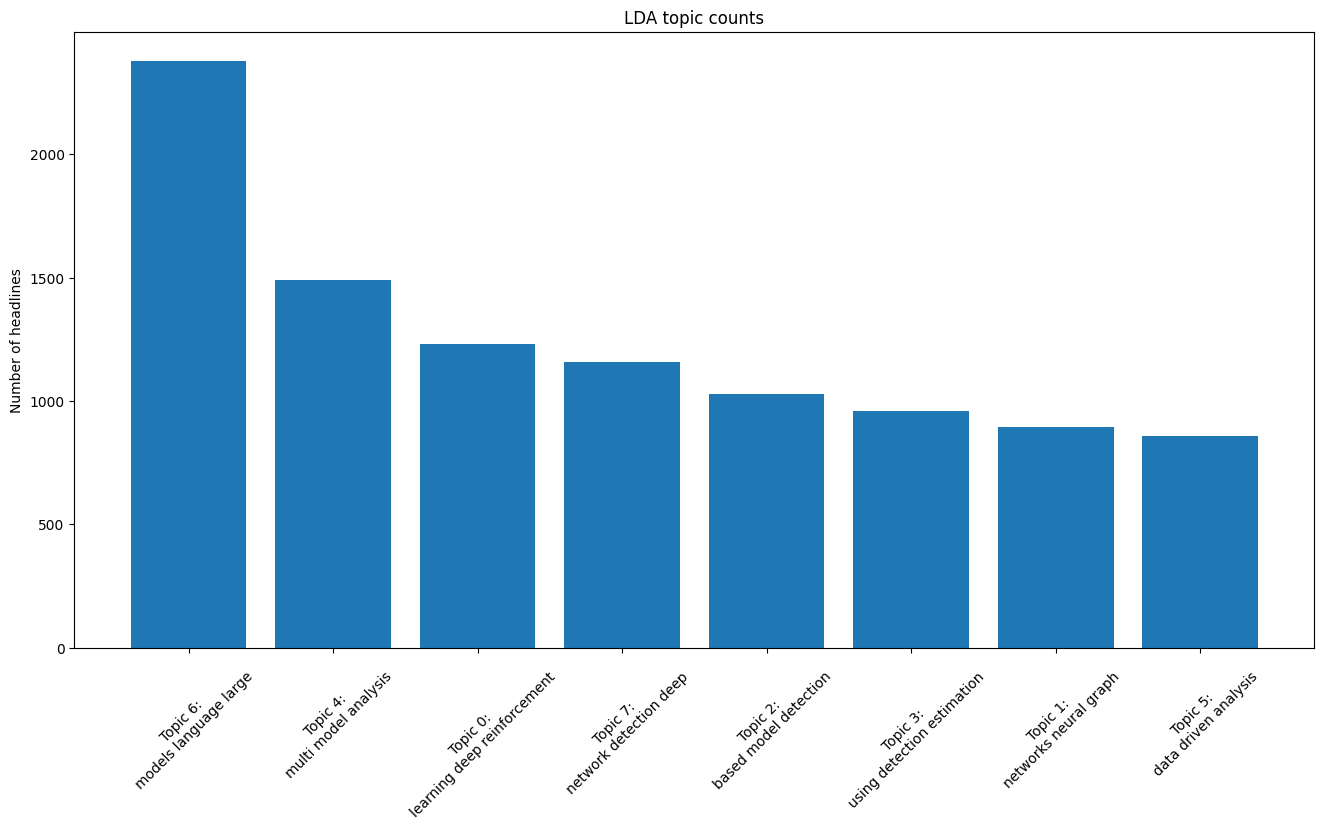

In [153]:
# Sort the LDA categories and counts in descending order
sorted_indices = np.argsort(lda_counts)[::-1]
sorted_categories = [lda_categories[i] for i in sorted_indices]
sorted_counts = [lda_counts[i] for i in sorted_indices]

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the LDA topic counts in descending order
ax.bar(range(len(sorted_categories)), sorted_counts)

# Set x-axis ticks and labels
ax.set_xticks(range(len(sorted_categories)))
ax.set_xticklabels([labels[i] for i in sorted_indices], rotation=45)

# Set y-axis label and title
ax.set_ylabel('Number of headlines')
ax.set_title('LDA topic counts')

# Show the plot
plt.show()

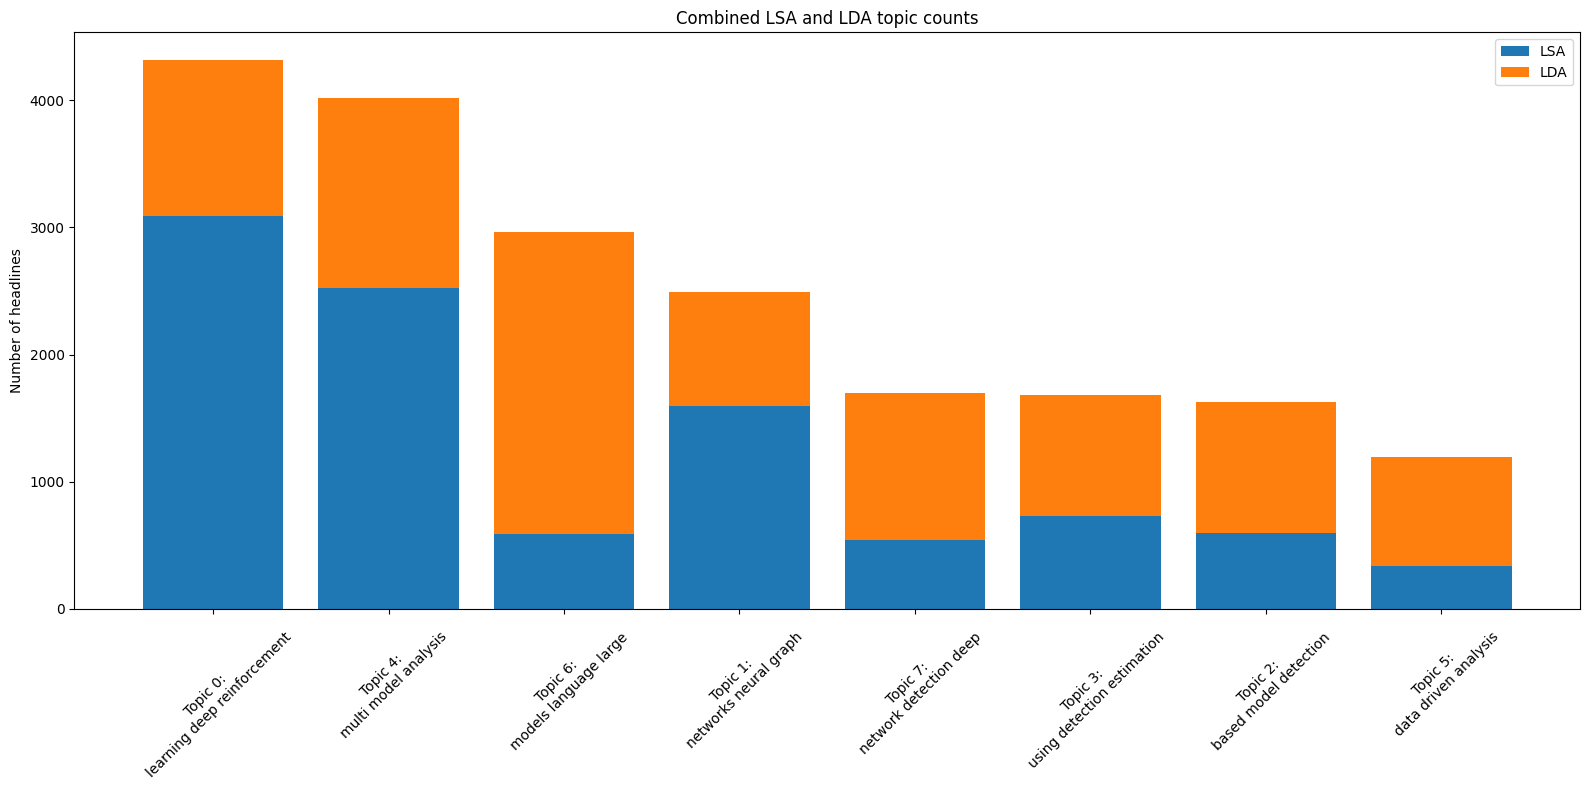

In [159]:
# Combine LSA and LDA counts and categories
combined_counts = np.array(lsa_counts) + np.array(lda_counts)
combined_categories = lsa_categories + lda_categories

# Sort the combined categories and counts in descending order
sorted_indices = np.argsort(combined_counts)[::-1]
sorted_categories = [combined_categories[i] for i in sorted_indices]
sorted_counts = [combined_counts[i] for i in sorted_indices]
sorted_lsa_counts = [lsa_counts[i] for i in sorted_indices]
sorted_lda_counts = [lda_counts[i] for i in sorted_indices]

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the combined LSA and LDA topic counts in descending order as a stacked bar chart
ax.bar(range(len(sorted_categories)), sorted_lsa_counts, label='LSA')
ax.bar(range(len(sorted_categories)), sorted_lda_counts, bottom=sorted_lsa_counts, label='LDA')

# Set x-axis ticks and labels
ax.set_xticks(range(len(sorted_categories)))
ax.set_xticklabels([labels[i] for i in sorted_indices], rotation=45)

# Set y-axis label and title
ax.set_ylabel('Number of headlines')
ax.set_title('Combined LSA and LDA topic counts')

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [143]:
# Initialize t-SNE model with specified parameters
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                      n_iter=2000, verbose=1, random_state=0, angle=0.75)

# Fit the t-SNE model to the LDA topic matrix to obtain 2D vectors
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.023s...
[t-SNE] Computed neighbors for 10000 samples in 1.152s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.085875
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.574966
[t-SNE] KL divergence after 2000 iterations: 1.590322


In [155]:
# Get the top 3 words for each topic using the LDA model
top_3_words_lda = get_top_n_words(5, lda_keys, small_document_term_matrix, small_count_vectorizer)

# Calculate the mean topic vectors for the LDA model
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

# Create a Bokeh plot for t-SNE clustering of LDA topics
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), width=700, height=700)

# Scatter plot of t-SNE vectors colored by LDA topic keys
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

# Add labels for each topic at the mean position of the topic vectors
for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

# Show the plot
show(plot)

In [145]:
%%capture
!pip install bertopic


In [146]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) 

In [154]:
from bertopic import BERTopic

ModuleNotFoundError: No module named 'bertopic'